In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from matplotlib.image import imread

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

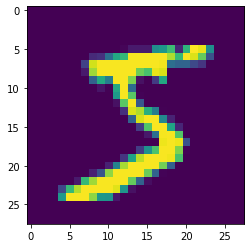

In [9]:
plt.imshow(single_image)

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

### one hot encode

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_test_cat = to_categorical(y_test)

In [20]:
y_train_cat = to_categorical(y_train)

In [22]:
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
stop = EarlyStopping(monitor="val_loss", mode = "min", patience=2)

In [28]:
28 * 28

784

In [33]:
model = Sequential()
model.add(Conv2D(filters = 64, strides = (1,1), 
                 kernel_size = (4,4), input_shape = (28,28,1), activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 300, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
model.fit(x_train,y_train_cat, validation_data=(x_test,y_test_cat), epochs=6, callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 254s 4ms/sample - loss: 0.1171 - accuracy: 0.9638 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 2/6
60000/60000 [==============================] - 251s 4ms/sample - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0501 - val_accuracy: 0.9842
Epoch 3/6
60000/60000 [==============================] - 251s 4ms/sample - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0384 - val_accuracy: 0.9877
Epoch 4/6
60000/60000 [==============================] - 251s 4ms/sample - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0393 - val_accuracy: 0.9882
Epoch 5/6
60000/60000 [==============================] - 252s 4ms/sample - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0455 - val_accuracy: 0.9872


In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.117060,0.963833,0.056224,0.9823
1,0.042932,0.986250,0.050104,0.9842
2,0.024319,0.992200,0.038382,0.9877
3,0.017538,0.994133,0.039296,0.9882
4,0.011445,0.996167,0.045528,0.9872


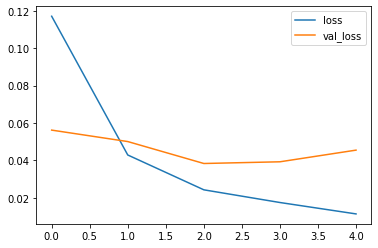

In [38]:
metrics[["loss", "val_loss"]].plot()

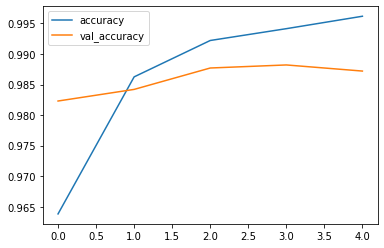

In [41]:
metrics[["accuracy", "val_accuracy"]].plot()

In [42]:
predictions = model.predict_classes(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [44]:
print(confusion_matrix(y_test, predictions))

[[ 973    1    0    2    0    2    2    0    0    0]
 [   0 1132    1    0    0    0    1    0    1    0]
 [   1    5 1012    3    1    0    3    5    1    1]
 [   0    0    1 1004    0    3    0    0    1    1]
 [   0    0    0    0  969    0    3    0    0   10]
 [   1    0    0    6    0  880    2    0    3    0]
 [   5    2    0    0    1    1  948    0    1    0]
 [   1    2    9    2    1    1    0 1003    1    8]
 [   5    0    1    0    0    0    1    1  960    6]
 [   0    2    0    1    8    5    0    1    1  991]]


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
print(explained_variance_score(y_test, predictions))

0.9715872237812475


In [47]:
import statsmodels.api as sm

In [55]:
x_train.shape

(60000, 28, 28, 1)